In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from __future__ import division, print_function
import sys
import os
# using the pyplot doing the plotting
import matplotlib.pyplot as plt
# import style "seaborn"
import seaborn as sns

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


#### Check the environmental variable DFDATA

In [2]:
os.getenv("DFDATA")

'/gws/open/NYCOpenData/nycopendata/data'

### Example 1.

#### Use pandas to read in the CSV file from the DF into a pandas dataframe

In [3]:
DFDATA = os.getenv("DFDATA")
df = pd.read_csv(DFDATA + '/h9gi-nx95/1428430582/h9gi-nx95', nrows=50000)

#### Display the top few rows of the DF

In [4]:
df.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,04/04/2015,9:25,MANHATTAN,10001.0,40.750788,-74.005630,"(40.7507879, -74.0056304)",WEST 26 STREET,11 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,3197298,PICK-UP TRUCK,LIVERY VEHICLE,NaN,NaN,NaN
1,04/04/2015,21:15,QUEENS,11357.0,40.781291,-73.814200,"(40.7812915, -73.8141997)",20 AVENUE,150 STREET,NaN,...,Unspecified,NaN,NaN,NaN,3198105,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN
2,04/04/2015,16:52,QUEENS,11385.0,40.702595,-73.855293,"(40.7025952, -73.8552926)",WOODHAVEN BOULEVARD,MYRTLE AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,3197589,PASSENGER VEHICLE,OTHER,NaN,NaN,NaN
3,04/04/2015,9:30,MANHATTAN,10025.0,40.804886,-73.962474,"(40.8048862, -73.9624735)",WEST 113 STREET,AMSTERDAM AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,3197369,PASSENGER VEHICLE,UNKNOWN,NaN,NaN,NaN
4,04/04/2015,9:41,QUEENS,11428.0,40.715144,-73.749356,"(40.7151436, -73.7493556)",211 STREET,JAMAICA AVENUE,NaN,...,NaN,NaN,NaN,NaN,3197601,PASSENGER VEHICLE,NaN,NaN,NaN,NaN


#### Remove all but 2 numerical values columns

In [5]:
# convert to dtype='datetime64[ns]'
pd.to_datetime(df['DATE'])
# Remove all but 2 numerical values columns
df.drop(['TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE',
       'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME', 'OFF STREET NAME',
       'NUMBER OF PERSONS KILLED',
       'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
       'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
       'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED',
       'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2',
       'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4',
       'CONTRIBUTING FACTOR VEHICLE 5', 'UNIQUE KEY', 'VEHICLE TYPE CODE 1',
       'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4',
       'VEHICLE TYPE CODE 5'], axis=1, inplace=True)
df.head(10)

,DATE,NUMBER OF PERSONS INJURED
0,04/04/2015,0
1,04/04/2015,1
2,04/04/2015,0
3,04/04/2015,0
4,04/04/2015,0
5,04/04/2015,0
6,04/04/2015,0
7,04/04/2015,0
8,04/04/2015,0
9,04/04/2015,0


#### Prepare the data for plotting

In [6]:
df = df.sort_values(by='DATE')
# count the sum of collisions happened in the same day
dfsum = df.groupby(['DATE'], sort=True).sum()
dfsum.head()

,NUMBER OF PERSONS INJURED
DATE,
01/05/2015,95
01/06/2015,142
01/07/2015,151
01/08/2015,117
01/09/2015,153


#### Plot the columns one against the other using the dataframe plot method

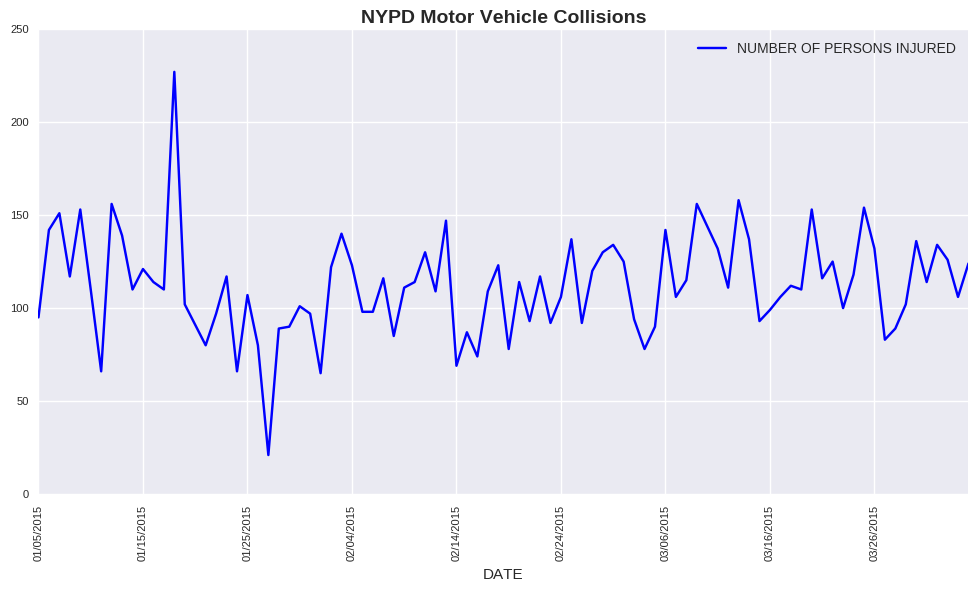

In [7]:
dfsum.plot(kind="line", grid=True, figsize=(12, 6), fontsize = 8, color="b", rot=90)
plt.title("NYPD Motor Vehicle Collisions", fontweight='bold', fontsize = 14)

### Example 2.

#### Use pandas to read in the CSV file from the DF into a pandas dataframe

In [8]:
DFDATA = os.getenv("DFDATA")

In [9]:
df = pd.read_csv(DFDATA + '/ia2d-e54m/1414245804/ia2d-e54m')

In [10]:
df.head()

,Year,NYC Consumption(Million gallons per day),Per Capita(Gallons per person per day)
0,2009,1007.2,125.8
1,2008,1082.9,135.2
2,2007,1113.9,139.1
3,2006,1068.7,133.5
4,2005,1107.4,138.3


#### Display the top few rows of the DF

In [11]:
df = df.sort_values(by='Year')
df.head()

,Year,NYC Consumption(Million gallons per day),Per Capita(Gallons per person per day)
30,1979,1512.4,189.0
29,1980,1505.9,187.9
28,1981,1309.3,181.4
27,1982,1382.4,195.5
26,1983,1423.8,201.4


#### Remove all but 2 numerical values columns

In [12]:
df.columns

Index(['Year', 'NYC Consumption(Million gallons per day)',
       'Per Capita(Gallons per person per day)'],
      dtype='object')

In [13]:
df.drop('NYC Consumption(Million gallons per day)', axis=1, inplace=True)
df.head(10)

,Year,Per Capita(Gallons per person per day)
30,1979,189.0
29,1980,187.9
28,1981,181.4
27,1982,195.5
26,1983,201.4
25,1984,207.2
24,1985,187.5
23,1986,190.4
22,1987,201.9
21,1988,208.3


#### Plot the columns one against the other using the dataframe plot method

([<matplotlib.axis.XTick at 0x7f730406b080>,
 <a list of 31 Text xticklabel objects>)

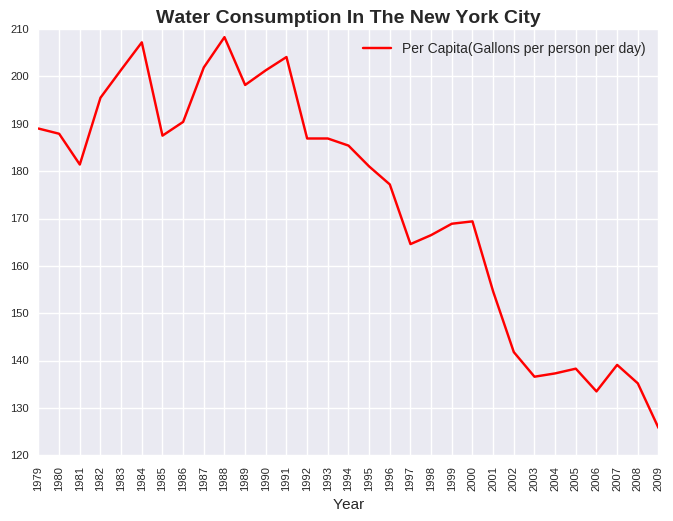

In [14]:
df.plot(kind="line", x='Year', y='Per Capita(Gallons per person per day)',
        grid=True, fontsize = 8, color="r", rot=90)
plt.title("Water Consumption In The New York City",
          fontweight='bold', fontsize = 14)
plt.xticks(np.arange(1979,2010,1.0))